In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/cleaned_rounds_data_with_stats.csv')
df.head()

,round_winner,team_1_position,team_1_win_percentage,team_2_position,team_2_win_percentage,player_1_team_name,player_1_name,player_1_rating,player_1_kills_per_round,player_1_headshots,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,30,58.1,5,66.7,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,0,1,1,0,0
1,1,30,58.1,5,66.7,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,1,1,1,0,0
2,0,30,58.1,5,66.7,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,1,0,1,0,0
3,1,30,58.1,5,66.7,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,1,0,1,0,0
4,1,30,58.1,5,66.7,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,1,1,1,0,0


In [3]:
df = df.drop(columns=[f'player_{i}_{suffix}' for i in range(1, 11) for suffix in ['team_name', 'name']])
df.head()

,round_winner,team_1_position,team_1_win_percentage,team_2_position,team_2_win_percentage,player_1_rating,player_1_kills_per_round,player_1_headshots,player_1_deaths_per_round,player_1_rounds_contributed,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,0,1,1,0,0
1,1,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,1,1,1,0,0
2,0,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,1,0,1,0,0
3,1,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,1,0,1,0,0
4,1,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,1,1,1,0,0


In [4]:
X = df.drop(['round_winner'], axis=1)
X.head()

,team_1_position,team_1_win_percentage,team_2_position,team_2_win_percentage,player_1_rating,player_1_kills_per_round,player_1_headshots,player_1_deaths_per_round,player_1_rounds_contributed,player_1_team_num,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,0,1,1,0,0
1,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,1,1,1,0,0
2,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,1,0,1,0,0
3,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,1,0,1,0,0
4,30,58.1,5,66.7,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,1,1,1,0,0


In [5]:
y = df['round_winner']

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
best_params = {
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.0,
    'reg_lambda': 0.1,
    'scale_pos_weight': 1.0
}

PERFORMANCE OF THE MODEL USING THE OPTIMAL PARAMETERS

In [9]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=10000, **best_params)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("Average ROC-AUC: ", scores.mean())

Average ROC-AUC:  0.8667316956397066


In [10]:
X_columns = df.drop(['round_winner'], axis=1).columns

In [11]:
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X_columns)
importances = importances.sort_values(ascending=False)
print(importances)

player_5_has_defuser           0.030912
player_2_Incendiary Grenade    0.028221
player_2_has_helmet            0.021731
player_6_has_defuser           0.018385
player_10_has_helmet           0.015976
                                 ...   
player_7_M249                  0.000000
player_7_Nova                  0.000000
player_7_XM1014                0.000000
player_7_Sawed-Off             0.000000
player_10_Decoy Grenade        0.000000
Length: 524, dtype: float32


In [12]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [13]:
print(classification_report(y_test, y_pred))
confusion_m = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(confusion_m, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

print({
    'true negatives': f'{round(100*confusion_m[0, 0]/len(y_test))}%',
    'false positives': f'{round(100*confusion_m[0, 1]/len(y_test))}%',
    'false negatives': f'{round(100*confusion_m[1, 0]/len(y_test))}%',
    'true positives': f'{round(100*confusion_m[1, 1]/len(y_test))}%'
})

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2270
           1       0.82      0.80      0.81      2405

    accuracy                           0.81      4675
   macro avg       0.81      0.81      0.81      4675
weighted avg       0.81      0.81      0.81      4675

                 Predicted Negative  Predicted Positive
Actual Negative                1857                 413
Actual Positive                 472                1933
{'true negatives': '40%', 'false positives': '9%', 'false negatives': '10%', 'true positives': '41%'}


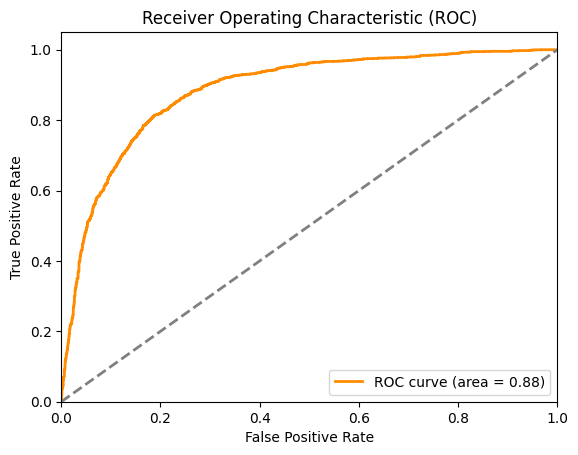

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

PERFORMANCE OF THE MODEL WITHOUT THE OPTIMAL PARAMETERS FOUND

In [15]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, n_estimators=10000)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("Average ROC-AUC: ", scores.mean())

Average ROC-AUC:  0.8609592209559576


In [16]:
X_columns = df.drop(['round_winner'], axis=1).columns

In [17]:
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X_columns)
importances = importances.sort_values(ascending=False)
print(importances)

player_5_has_defuser           0.022397
player_2_Incendiary Grenade    0.020451
player_6_has_defuser           0.019632
player_2_Dual Berettas         0.018800
player_2_has_helmet            0.017606
                                 ...   
player_7_Negev                 0.000000
player_7_M249                  0.000000
player_7_Nova                  0.000000
player_7_XM1014                0.000000
player_10_Decoy Grenade        0.000000
Length: 524, dtype: float32


In [18]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [19]:
print(classification_report(y_test, y_pred))
confusion_m = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(confusion_m, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

print({
    'true negatives': f'{round(100*confusion_m[0, 0]/len(y_test))}%',
    'false positives': f'{round(100*confusion_m[0, 1]/len(y_test))}%',
    'false negatives': f'{round(100*confusion_m[1, 0]/len(y_test))}%',
    'true positives': f'{round(100*confusion_m[1, 1]/len(y_test))}%'
})

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2270
           1       0.82      0.79      0.80      2405

    accuracy                           0.80      4675
   macro avg       0.80      0.80      0.80      4675
weighted avg       0.80      0.80      0.80      4675

                 Predicted Negative  Predicted Positive
Actual Negative                1842                 428
Actual Positive                 499                1906
{'true negatives': '39%', 'false positives': '9%', 'false negatives': '11%', 'true positives': '41%'}


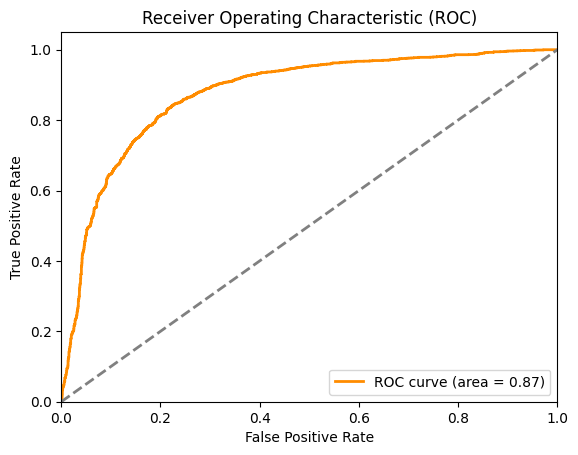

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()